# Comparison of Individual, Bagging and Boosting Algorithms

In [ ]:
!pip install xgboost -quiet

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
# import the data
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
df.shape

(53940, 10)

In [5]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy score:  0.7137560252131998
Precision score:  0.7137560252131998
Recall score:  0.7137560252131998
F1 score:  0.7137560252131998
Confusion matrix: 
 [[ 286   34    3    6    6]
 [  33  693   24   28  226]
 [   4   23 3403  343  519]
 [   5   62  329 2015  364]
 [   9  243  483  344 1303]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       335
           1       0.66      0.69      0.67      1004
           2       0.80      0.79      0.80      4292
           3       0.74      0.73      0.73      2775
           4       0.54      0.55      0.54      2382

    accuracy                           0.71     10788
   macro avg       0.72      0.72      0.72     10788
weighted avg       0.72      0.71      0.71     10788

CPU times: total: 344 ms
Wall time: 673 ms


Text(95.72222222222221, 0.5, 'Actual')

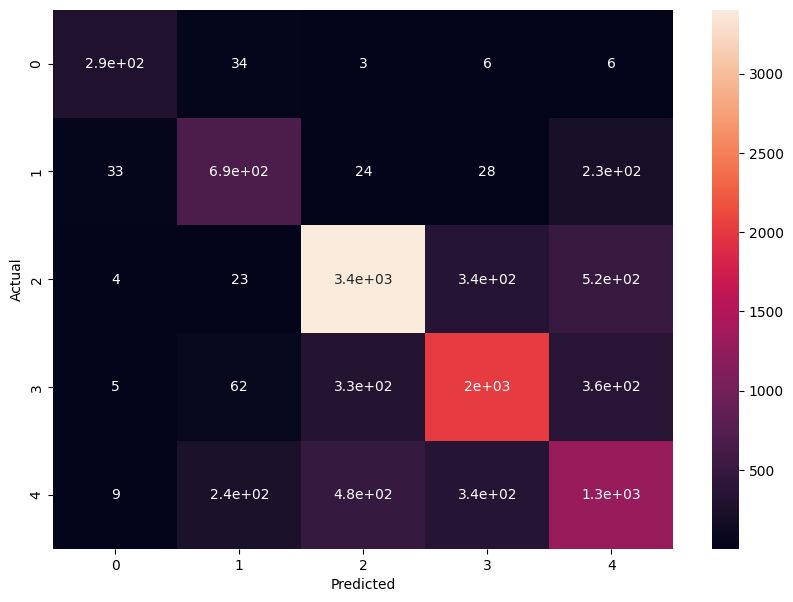

In [8]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# predict the test data
y_pred = dt.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))
# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Accuracy score:  0.7864293659621802
Precision score:  0.7864293659621802
Recall score:  0.7864293659621802
F1 score:  0.7864293659621802
Confusion matrix: 
 [[ 304   18    3    7    3]
 [  23  706   22   44  209]
 [   2   12 3940  162  176]
 [   1   15  305 2266  188]
 [   4  150  504  456 1268]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       335
           1       0.78      0.70      0.74      1004
           2       0.83      0.92      0.87      4292
           3       0.77      0.82      0.79      2775
           4       0.69      0.53      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.78      0.78     10788
weighted avg       0.78      0.79      0.78     10788

CPU times: total: 6.64 s
Wall time: 12.5 s


Text(95.72222222222221, 0.5, 'Actual')

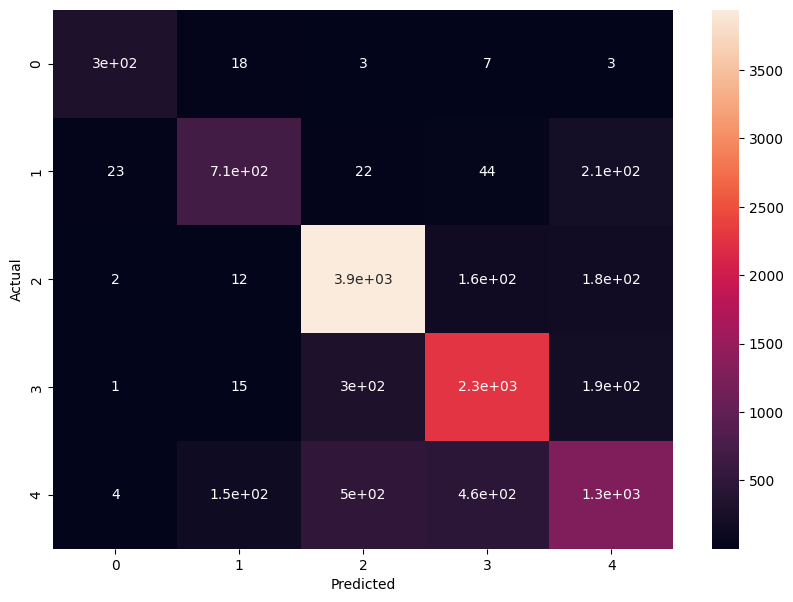

In [ ]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy score:  0.8056173526140156
Precision score:  0.8056173526140156
Recall score:  0.8056173526140156
F1 score:  0.8056173526140156
Confusion matrix: 
 [[ 303   19    3    6    4]
 [  23  714   14   20  233]
 [   1   11 3948  164  168]
 [   1    7  300 2274  193]
 [   3  137  501  289 1452]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.80      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.83      0.82      0.82      2775
           4       0.71      0.61      0.66      2382

    accuracy                           0.81     10788
   macro avg       0.82      0.79      0.80     10788
weighted avg       0.80      0.81      0.80     10788



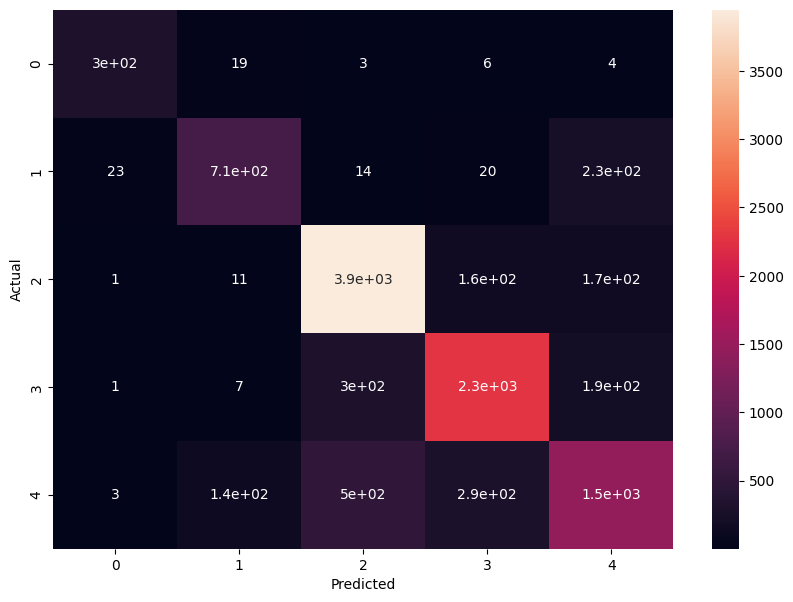

CPU times: total: 4.33 s
Wall time: 2.61 s


In [10]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

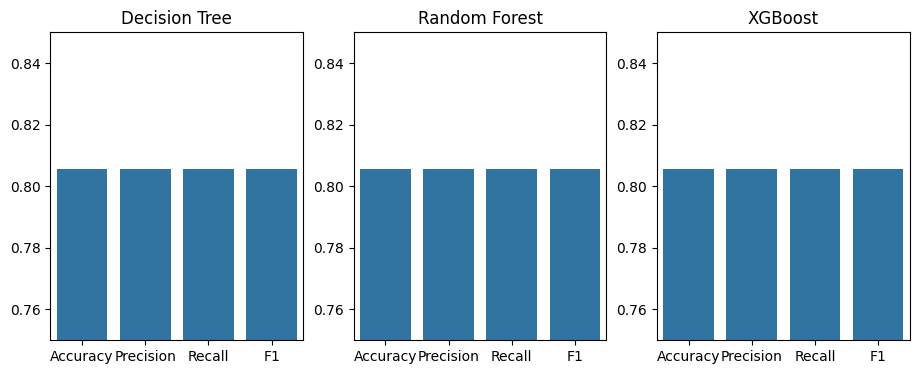

In [14]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
# Y axis limit
plt.ylim(0.75, 0.85)
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
# Y axis limit
plt.ylim(0.75, 0.85)
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# Y axis limit
plt.ylim(0.75, 0.85)
# plt.tight_layout()
plt.show()

## Assignment Alert

### Please compare the mdoels for regression example on your favorite dataset

---